## *RFM Analysis*

In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
df=pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1',header=0)
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format="%d-%m-%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [438]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [440]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [441]:
# Droping Null Values
df.dropna(inplace=True)

In [442]:
# Dealing with the +ve values for Quality and Unit Price
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0.01]

In [443]:
# CHecking the Shape of DF
df.shape

(397880, 8)

In [444]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397880.000000,397880.000000,397880.000000
mean,12.988358,3.116519,15294.428491
std,179.332672,22.097986,1713.145555
min,1.000000,0.040000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [445]:
# Creating Amount Column
df['Amount']=df['Quantity']*df['UnitPrice']

In [446]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [447]:
df['Amount'].describe()

count    397880.000000
mean         22.397225
std         309.072587
min           0.060000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Amount, dtype: float64

In [448]:
# Grouping by CustId,Amount for Monetry 
monetry=df.groupby('CustomerID')['Amount'].agg('sum')

In [449]:
# converting it into Data Frame using reset_index()
monetry=monetry.reset_index()
monetry.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [450]:
#changing the columns name
monetry.columns=['CustomerID','amt']

In [451]:
# Grouping by CustId,InvoiceNo for Frequency
freq=df.groupby('CustomerID')['InvoiceNo'].agg('count')

In [452]:
# converting it into Data Frame using reset_index()
freq=freq.reset_index()

In [454]:
freq.head()

,CustomerID,Freq
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
#changing the column name
freq.columns=['CustomerID','Freq']

In [455]:
# Initailzing current date value in max_dt
max_dt=max(df['InvoiceDate'])
max_dt

Timestamp('2011-12-09 12:50:00')

In [456]:
# Creating Recent Column
df['Recent']=max_dt-df['InvoiceDate']
df['Recent']=df['Recent'].apply(lambda x:x.days)

In [457]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Recent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [458]:
# Grouping by CustId,InvoiceNo for Recency
recency=df.groupby('CustomerID')['Recent'].agg('min')

In [459]:
recency=recency.reset_index()

In [460]:
recency.head()

,CustomerID,Recent
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [461]:
# Recency should be greator than Zero hence:
recency['Recent']=recency['Recent']+1

In [462]:
recency.describe()

,CustomerID,Recent
count,4338.000000,4338.000000
mean,15300.408022,92.536422
std,1721.808492,100.014169
min,12346.000000,1.000000
25%,13813.250000,18.000000
50%,15299.500000,51.000000
75%,16778.750000,142.000000
max,18287.000000,374.000000


## Merging Recency Frequency and Monetry in to RFM

In [463]:
RFM=monetry.merge(freq,on='CustomerID')

In [464]:
RFM=RFM.merge(recency,on='CustomerID')

In [465]:
RFM.head()

,CustomerID,amt,Freq,Recent
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310


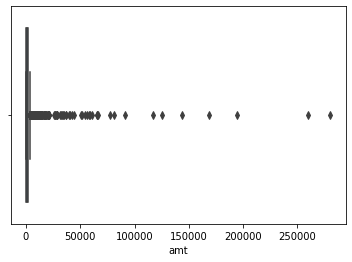

In [466]:
# checking outliers
sns.boxplot(RFM['amt'])

## Removing outliers using IQR for Amount

In [467]:
q1=RFM['amt'].quantile(0.25)
q3=RFM['amt'].quantile(0.75)


IQR=q3-q1

ll=q1-1.5*IQR
ul=q3+1.5*IQR

In [471]:
RFM=RFM[~((RFM['amt']<q1-1.5*IQR) | (RFM['amt']>q3+1.5*IQR))]

In [472]:
RFM.head()

,CustomerID,amt,Freq,Recent
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
5,12352.0,2506.04,85,36
6,12353.0,89.00,4,204


In [473]:
RFM.describe()

,CustomerID,amt,Freq,Recent
count,3911.000000,3911.000000,3911.000000,3911.000000
mean,15337.583227,886.654536,61.515981,99.885707
std,1706.707613,828.537759,77.311961,101.581824
min,12348.000000,3.750000,1.000000,1.000000
25%,13867.500000,283.510000,15.000000,22.000000
50%,15348.000000,588.220000,35.000000,59.000000
75%,16805.500000,1246.210000,79.000000,158.000000
max,18287.000000,3692.280000,970.000000,374.000000


## Removing Outliers of Freq with IQR method

In [474]:
q1=RFM['Freq'].quantile(0.25)
q3=RFM['Freq'].quantile(0.75)


IQR=q3-q1

ll=q1-1.5*IQR
ul=q3+1.5*IQR

In [475]:
RFM=RFM[~((RFM['Freq']<q1-1.5*IQR) | (RFM['Freq']>q3+1.5*IQR))]

In [476]:
RFM.head()

,CustomerID,amt,Freq,Recent
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
5,12352.0,2506.04,85,36
6,12353.0,89.00,4,204


In [477]:
RFM.describe()

,CustomerID,amt,Freq,Recent
count,3660.000000,3660.000000,3660.000000,3660.000000
mean,15309.316667,801.875077,46.100273,104.715847
std,1717.904764,754.267170,40.892684,102.854797
min,12348.000000,3.750000,1.000000,1.000000
25%,13821.750000,264.217500,14.000000,24.000000
50%,15307.500000,530.165000,31.000000,64.000000
75%,16789.250000,1079.055000,67.000000,170.000000
max,18287.000000,3683.860000,175.000000,374.000000


## Applying KMeans Clustering

In [479]:
RFM.head()

,CustomerID,amt,Freq,Recent
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,310
5,12352.0,2506.04,85,36
6,12353.0,89.00,4,204


In [480]:
from sklearn.cluster import KMeans

In [481]:
from sklearn.metrics import silhouette_score

In [482]:
RFM.drop('CustomerID',1,inplace=True)

In [483]:
from sklearn.preprocessing import StandardScaler

In [484]:
#ss=StandardScaler()
cols=RFM.columns

In [485]:
#RFM=ss.fit_transform(RFM)

In [486]:
#RFM=pd.DataFrame(RFM,columns=cols)

In [487]:
RFM.head()

,amt,Freq,Recent
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
5,2506.04,85,36
6,89.00,4,204


In [488]:
kmeans=KMeans(n_clusters=3)

In [489]:
kmeans.fit(RFM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [490]:
# Adding new Column bassed on Kmeans Label for Profiling
RFM['Cluster']=kmeans.labels_

## Profiling based on the clusters 

In [491]:
Cluster=RFM.groupby('Cluster')['amt','Freq','Recent'].agg('mean')

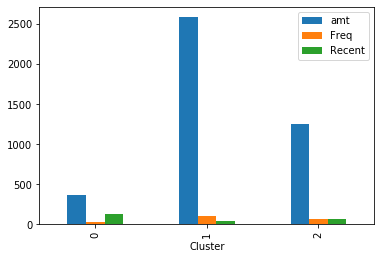

In [492]:
Cluster.plot(kind='bar')

In [495]:
amt1=RFM.groupby('Cluster')['amt'].agg('mean')
freq1=RFM.groupby('Cluster')['Freq'].agg('mean')
rec1=RFM.groupby('Cluster')['Recent'].agg('mean')

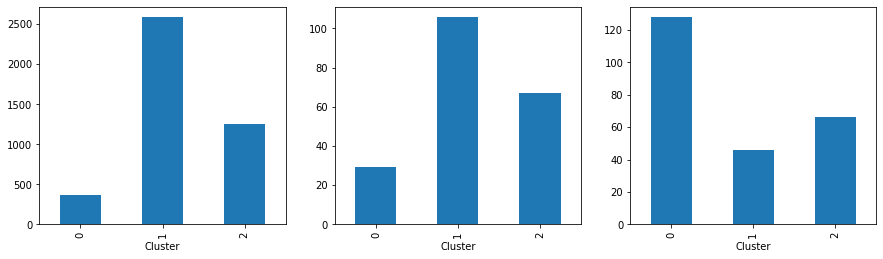

In [498]:
# ploting them based on clusters in x axis on RFM 
fig,axis=plt.subplots(1,3,figsize=(15,4))
amt1.plot.bar(ax=axis[0])# Monetory
freq1.plot.bar(ax=axis[1])# Frequency
rec1.plot.bar(ax=axis[2]) # Recency
plt.show()

## Infrences : 

### *In the first Graph (Monetry vs Cluster): We See that the custId's in the Cluster 1 spends a high amt of money followed by cluster 2 and Cluster 0 *

### *In the Second Graph (Frequency vs Cluster): We See that the custId's in the Cluster 1 has a high frequency followed by cluster 2 and Cluster 0 *

### *In the Third Graph (Recency vs Cluster): We See that the custId's in the Cluster 0 has a has high Recency followed by cluster 2 and Cluster 1 *

### ->> Hence from the above we see that the cluster 1 customers buy in bulk amount and hence can be kept in seperate category by the Store Owner . But Cluster 0 customer are Loyal customers becouse they purchase more often from the stores hence should be kept in Seperate category for future product promotions..
